# Simplifying Plotting with Seaborn
In seaborn, we have access to a number of different plotting tools. Let's take a look at:
 ### Plot Type Six:
- Box Plots
- Swarm Plots
- Violin Plots

In [1]:
import copy
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn.impute import KNNImputer

%matplotlib inline

# Read csv into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv')

# Clean df by deleting columns that are not useful
for col in ['PassengerId','Name','Cabin','Ticket']:
    if col in df:
        del df[col]

# create obj using K-Nearest Neighbor Imputer
knn_obj = KNNImputer(n_neighbors=5)

# convert df into numpy array
temp = df[['Pclass','Age','SibSp','Parch','Fare']].to_numpy()

# fit and transform given numpy df
temp_imputed = knn_obj.fit_transform(temp)

# Create Deep Copy using old df
df_imputed = copy.deepcopy(df)

# substitute values from imputed obj
df_imputed[['Pclass','Age','SibSp','Parch','Fare']] = temp_imputed
df_imputed['age_range'] = pd.cut(df_imputed['Age'],[0,15,25,65,1e6], labels=['child','young adult','adult','senior'])
df_grouped = df_imputed.groupby(by=['Pclass', 'age_range'])
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()

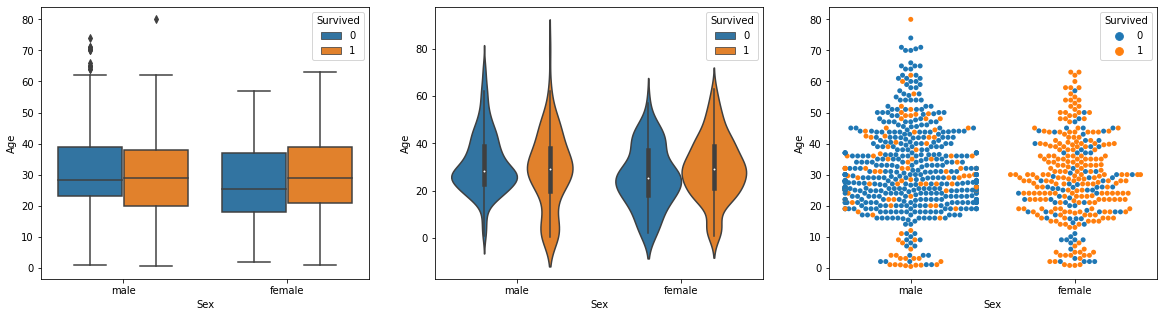

In [2]:
# So much repeated code, can we make it shorter?
plt.subplots(figsize=(20,5))

args = {'x' : 'Sex', 'y' : 'Age', 'hue' : 'Survived', 'data' : df_imputed}

for i, plot_func in enumerate([sns.boxplot, sns.violinplot, sns.swarmplot]):
    plt.subplot(1,3,i+1)
    plot_func(**args)

plt.show()

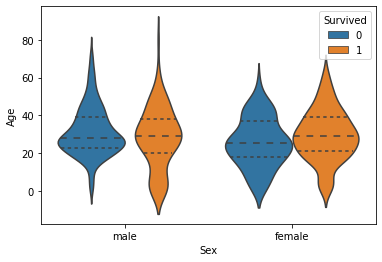

In [3]:
sns.violinplot(x="Sex", y="Age", hue='Survived', data=df_imputed, dodge=True, inner="quart")
plt.show()
